In [22]:
%load_ext autoreload
%autoreload 2

import cosmohmc.dist1d.sampler as sampler
import numpy as np
from matplotlib import pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
def gaussian_log_prob(x, mean=0, variance=1):
    """Compute log probability of Gaussian with given mean and variance at x."""
    return -0.5 * np.log(2 * np.pi * variance) - (x - mean)**2 / (2 * variance)

def gaussian_grad_log_prob(x, mean=0, variance=1):
    return -(x - mean) / variance

# Example: Creating the sampler for a Gaussian distribution
smplr = sampler.mcmcsampler(log_prob=lambda x: gaussian_log_prob(x, mean=0, variance=1),
                      proposal_width=1, n_samples=1000)
hmcsmplr = sampler.HMCsampler(log_prob=lambda x: gaussian_log_prob(x, 0, 1),grad_log_prob=lambda x: gaussian_grad_log_prob(x),
                     step_size=0.1, n_steps=10, n_samples=1000)

mcmcsamples = smplr.sample()
hmcsamples = hmcsmplr.sample()


In [24]:
smplr.acceptance_rate

0.671

In [25]:
hmcsmplr.acceptance_rate

0.998

In [26]:
def log_prob_gaussian(x, mean=np.zeros(2), covariance=np.eye(2)):
    inv_covariance = np.linalg.inv(covariance)
    n = len(mean)
    return -0.5 * np.dot(x - mean, np.dot(inv_covariance, x - mean))

# Gradient of the log probability for a 2D Gaussian distribution
def grad_log_prob_gaussian(x, mean=np.zeros(2), covariance=np.eye(2)):
    inv_covariance = np.linalg.inv(covariance)
    return -np.dot(inv_covariance, x - mean)

In [27]:
sampler_mcmc = sampler.mcmcsampler2D(log_prob=lambda x: log_prob_gaussian(x),
                             proposal_width=0.5, n_samples=10000)
samples_mcmc = sampler_mcmc.sample()

# Instantiate and use the HMCsampler2D
sampler_hmc = sampler.HMCsampler2D(log_prob=lambda x: log_prob_gaussian(x),
                           grad_log_prob=lambda x: grad_log_prob_gaussian(x),
                           step_size=0.1, n_steps=20, n_samples=10000)
samples_hmc = sampler_hmc.sample()

In [28]:
print("MCMC Sampler Acceptance Rate:", sampler_mcmc.acceptance_rate)
print("HMC Sampler Acceptance Rate:", sampler_hmc.acceptance_rate)

MCMC Sampler Acceptance Rate: 0.7484
HMC Sampler Acceptance Rate: 0.9994


In [30]:
samples_mcmc = np.array(samples_mcmc)
samples_hmc = np.array(samples_hmc)

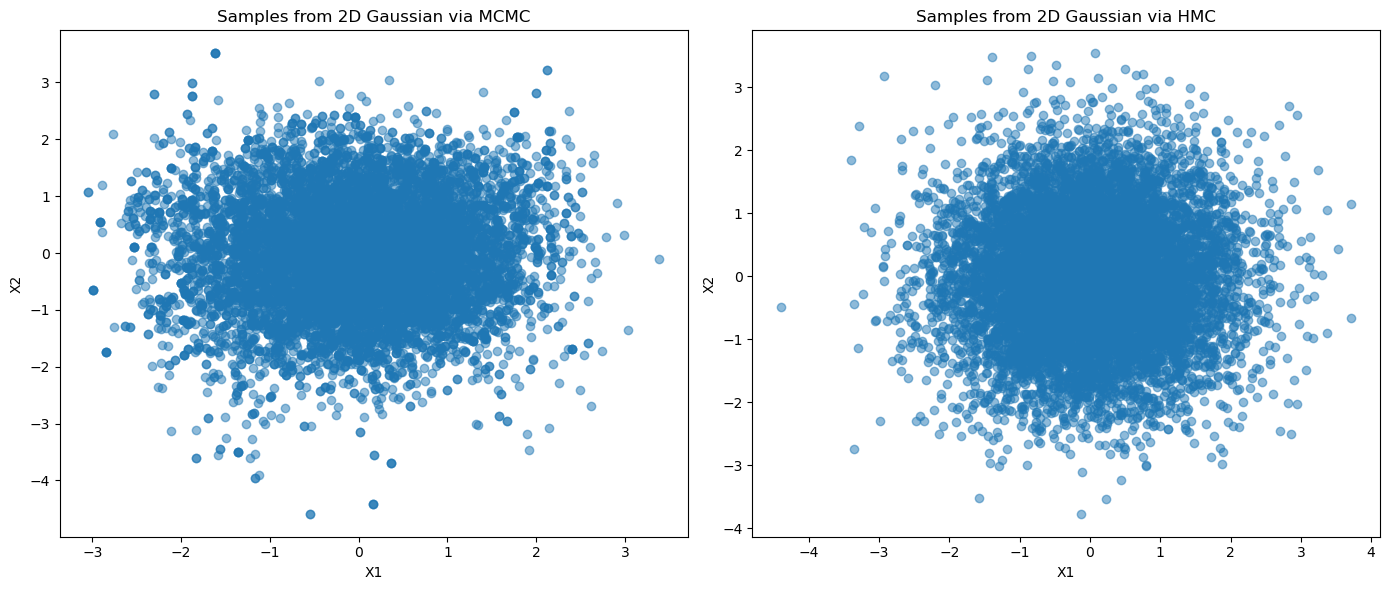

In [31]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(samples_mcmc[:, 0], samples_mcmc[:, 1], alpha=0.5)
plt.title('Samples from 2D Gaussian via MCMC')
plt.xlabel('X1')
plt.ylabel('X2')

plt.subplot(1, 2, 2)
plt.scatter(samples_hmc[:, 0], samples_hmc[:, 1], alpha=0.5)
plt.title('Samples from 2D Gaussian via HMC')
plt.xlabel('X1')
plt.ylabel('X2')

plt.tight_layout()
plt.show()

In [10]:
# Parameters for the target distribution
target_mean = 0
target_variance = 1

# Width of the proposal distribution and number of samples to draw
proposal_width = 1
n_samples = 100000  # Specify the desired number of samples

# Create an instance of mcmcsampler with specified parameters
samplr = sampler.mcmcsampler(target_mean, target_variance, proposal_width, n_samples)

# Run the Metropolis-Hastings algorithm to draw samples
samples = samplr.sample()

In [12]:
hmcsmplr = sampler.hmcsampler(target_mean, target_variance)
samples = hmcsmplr.sample()

In [13]:
hmcsmplr.acceptance_rate

1.0

In [11]:
samplr.acceptance_rate

0.70424

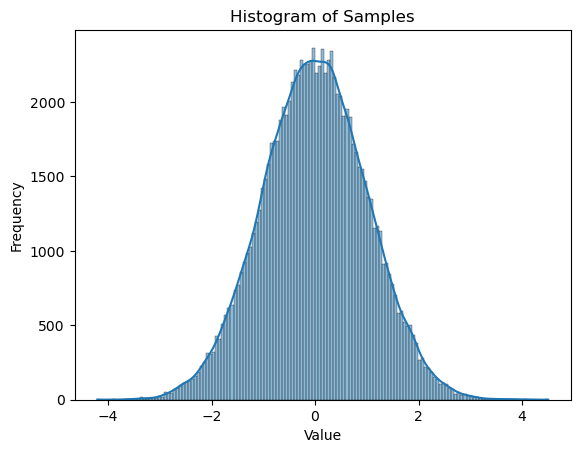

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(samples, kde=True)
plt.title('Histogram of Samples')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [6]:
cosmohmc.sampler.hmcsampler(data="something").sample()

'Sampling from the universe!'

In [2]:
from cosmohmc import hmcsampler

In [4]:
from cosmohmc import HmcSampler

# Assuming you have some cosmological data to analyze
# For demonstration, let's just use a placeholder for the data
cosmological_data = "Placeholder for actual data"

# Initialize the sampler with your data
sampler = HmcSampler(data=cosmological_data)

# Use the sample method
results = sampler.sample()

# Print the results
print(results)

Sampling from the universe!
